<a href="https://colab.research.google.com/github/SiberianHedgehog/HonGong/blob/main/CH3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3-1 k-최근접 이웃 회귀

## 데이터 준비 

In [ ]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

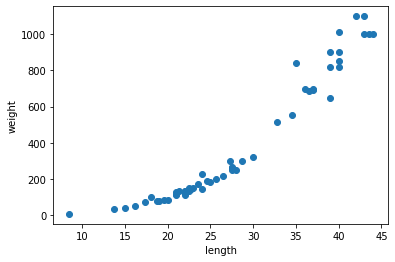

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(perch_length, perch_weight, random_state=42)

print(x_train.shape, x_test.shape, '\n')
print(y_train.shape, y_test.shape, '\n')

(42,) (14,) 

(42,) (14,) 



In [ ]:
#sklearn의 train set는 2차원 배열이어야함 ->n개의 행과 1개의 열

x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print(x_train.shape, y_train.shape)

(42, 1) (42, 1)


## K-최근접 이웃 회귀

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(x_train, y_train)

KNeighborsRegressor()

## 모델 평가

 결정계수
 
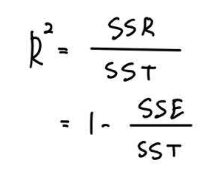
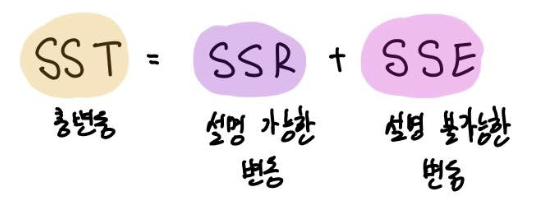

In [ ]:
#결정계수(R^2) = 1 - [sum(y_test - y_predict).squared / sum(y_test-average).squared]

print('train set 정확도 : ', knr.score(x_train, y_train))
print('test set 정확도 : ', knr.score(x_test, y_test))

train set 정확도 :  0.9698823289099254
test set 정확도 :  0.992809406101064


=> train set보다 test set의 정확도가 더 높음 : 과소적합 = 모델이 너무 단순하거나, 데이터 부족 

평균 절댓값 오차

In [ ]:
from sklearn.metrics import mean_absolute_error

y_predict = knr.predict(x_test)
mae = mean_absolute_error(y_test, y_predict)

print(mae)

19.157142857142862


#3-2 선형회귀